# Unsupervised Machine Learning

### Principle Component Analysis

#### Co-variance Matrix

In [1]:
import numpy as np
import pandas as pd

In [2]:
a=[[2,2],[3,4],[4,5],[5,7],[9,11]]
b=["X","Y"]

In [3]:
a

[[2, 2], [3, 4], [4, 5], [5, 7], [9, 11]]

In [4]:
df=pd.DataFrame(a,columns=b)

In [5]:
df

,X,Y
0,2,2
1,3,4
2,4,5
3,5,7
4,9,11


In [6]:
df.shape

(5, 2)

In [8]:
np.cov(df)

array([[0. , 0. , 0. , 0. , 0. ],
       [0. , 0.5, 0.5, 1. , 1. ],
       [0. , 0.5, 0.5, 1. , 1. ],
       [0. , 1. , 1. , 2. , 2. ],
       [0. , 1. , 1. , 2. , 2. ]])

In [9]:
df.T

,0,1,2,3,4
X,2,3,4,5,9
Y,2,4,5,7,11


In [11]:
np.cov(df.T)

array([[ 7.3 ,  9.15],
       [ 9.15, 11.7 ]])

# PCA project

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
digits = pd.read_csv('digits.csv')

In [14]:
digits.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,number_label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [15]:
digits.shape

(1797, 65)

In [16]:
digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pixel_0_0     1797 non-null   float64
 1   pixel_0_1     1797 non-null   float64
 2   pixel_0_2     1797 non-null   float64
 3   pixel_0_3     1797 non-null   float64
 4   pixel_0_4     1797 non-null   float64
 5   pixel_0_5     1797 non-null   float64
 6   pixel_0_6     1797 non-null   float64
 7   pixel_0_7     1797 non-null   float64
 8   pixel_1_0     1797 non-null   float64
 9   pixel_1_1     1797 non-null   float64
 10  pixel_1_2     1797 non-null   float64
 11  pixel_1_3     1797 non-null   float64
 12  pixel_1_4     1797 non-null   float64
 13  pixel_1_5     1797 non-null   float64
 14  pixel_1_6     1797 non-null   float64
 15  pixel_1_7     1797 non-null   float64
 16  pixel_2_0     1797 non-null   float64
 17  pixel_2_1     1797 non-null   float64
 18  pixel_2_2     1797 non-null 

In [17]:
digits.isnull().sum()

pixel_0_0       0
pixel_0_1       0
pixel_0_2       0
pixel_0_3       0
pixel_0_4       0
               ..
pixel_7_4       0
pixel_7_5       0
pixel_7_6       0
pixel_7_7       0
number_label    0
Length: 65, dtype: int64

#### Create a new DataFrame called pixels that consists only of the pixel feature values by dropping the number_label column.

In [18]:
pixels = digits.drop('number_label',axis=1)

In [19]:
pixels

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


#### Grab a single image row representation by getting the first row of the pixels DataFrame.

In [20]:
single_image = pixels.iloc[0]

In [21]:
single_image

pixel_0_0     0.0
pixel_0_1     0.0
pixel_0_2     5.0
pixel_0_3    13.0
pixel_0_4     9.0
             ... 
pixel_7_3    13.0
pixel_7_4    10.0
pixel_7_5     0.0
pixel_7_6     0.0
pixel_7_7     0.0
Name: 0, Length: 64, dtype: float64

#### Convert this single row Series into a numpy array.

In [22]:
single_image.to_numpy()

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [23]:
single_image.to_numpy().shape

(64,)

In [24]:
x=single_image.to_numpy().reshape(8,8)
x

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

#### Use Matplotlib or Seaborn to display the array as an image representation of the number drawn. Remember your palette or cmap choice would change the colors, but not the actual pixel values.¶

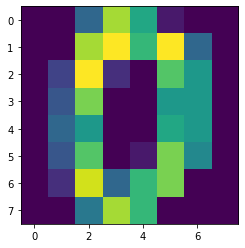

In [25]:
plt.imshow(x)

In [26]:
second_image = pixels.iloc[1]

In [27]:
second_image

pixel_0_0     0.0
pixel_0_1     0.0
pixel_0_2     0.0
pixel_0_3    12.0
pixel_0_4    13.0
             ... 
pixel_7_3    11.0
pixel_7_4    16.0
pixel_7_5    10.0
pixel_7_6     0.0
pixel_7_7     0.0
Name: 1, Length: 64, dtype: float64

In [28]:
x=second_image.to_numpy().reshape(8,8)
x

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

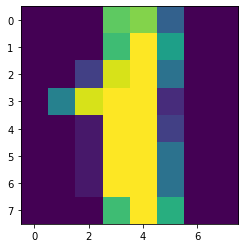

In [29]:
plt.imshow(x)

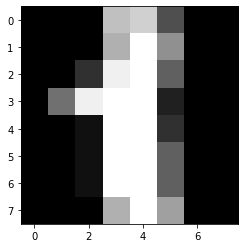

In [30]:
plt.imshow(x,cmap='gray')

<AxesSubplot:>

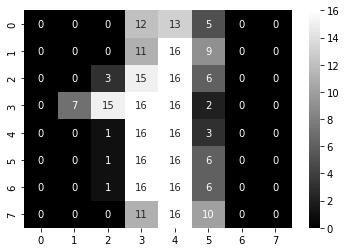

In [31]:
sns.heatmap(x,annot=True,cmap='gray')

### Use Scikit-Learn to scale the pixel feature dataframe.

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler=StandardScaler()

In [34]:
scaled_pixels=scaler.fit_transform(pixels)

In [35]:
scaled_pixels

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

#### Perform PCA on the scaled pixel data set with 2 components.

In [36]:
from sklearn.decomposition import PCA

In [37]:
pca_model=PCA(n_components=2)

In [38]:
pca_pixels=pca_model.fit_transform(scaled_pixels)

In [39]:
pca_pixels

array([[ 1.91420553, -0.95450835],
       [ 0.58896008,  0.92463334],
       [ 1.30211151, -0.31717153],
       ...,
       [ 1.02257461, -0.14791251],
       [ 1.07602029, -0.38091678],
       [-1.25772096, -2.22759361]])

In [40]:
pca_model.explained_variance_ratio_

array([0.12033916, 0.09561054])

In [41]:
np.sum(pca_model.explained_variance_ratio_)

0.21594970498991695

In [42]:
pca_pixels


array([[ 1.91420553, -0.95450835],
       [ 0.58896008,  0.92463334],
       [ 1.30211151, -0.31717153],
       ...,
       [ 1.02257461, -0.14791251],
       [ 1.07602029, -0.38091678],
       [-1.25772096, -2.22759361]])

In [43]:
pd.DataFrame(pca_pixels)

,0,1
0,1.914206,-0.954508
1,0.588960,0.924633
2,1.302112,-0.317172
3,-3.020795,-0.868778
4,4.528960,-1.093480
...,...,...
1792,0.104285,0.255004
1793,2.423227,-1.429621
1794,1.022575,-0.147913
1795,1.076020,-0.380917


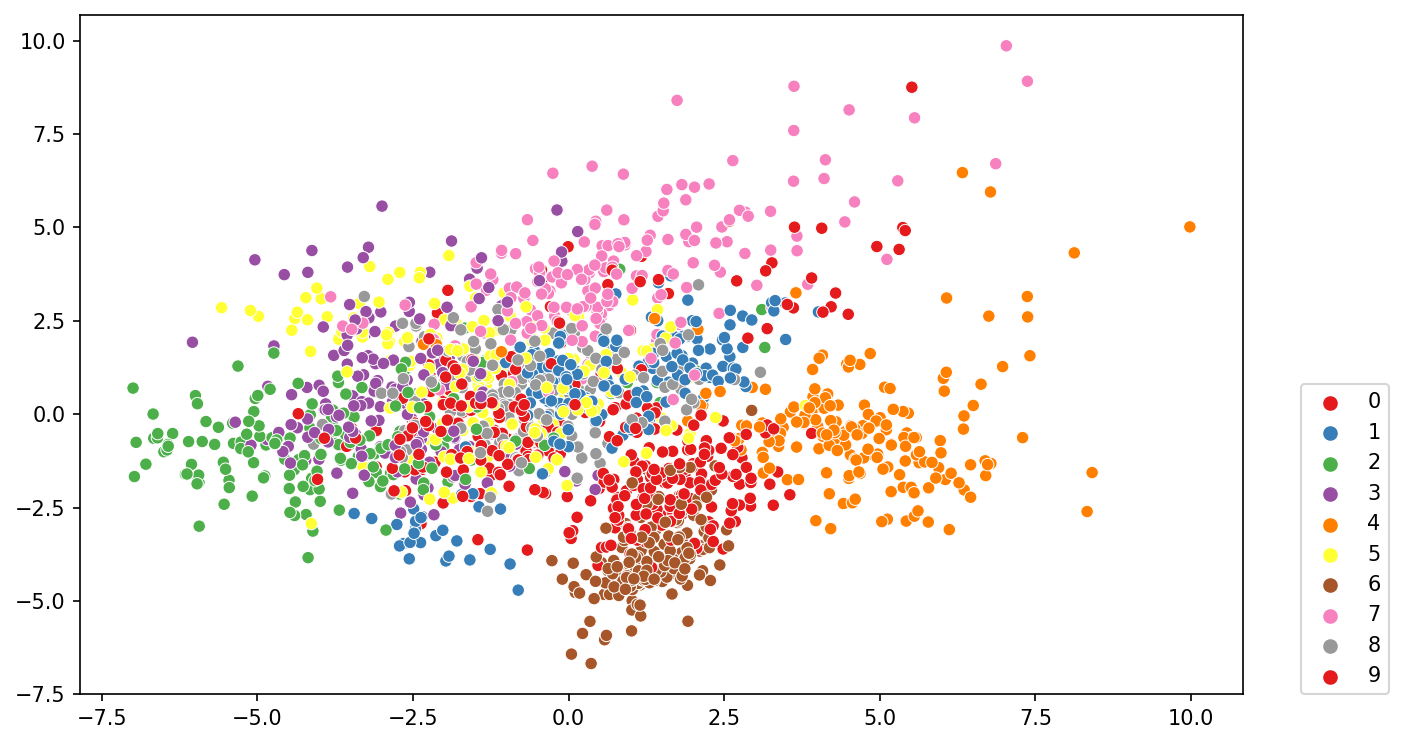

In [47]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(10,6),dpi=150)
labels = digits['number_label'].values
sns.scatterplot(pca_pixels[:,0],pca_pixels[:,1],hue=labels,palette='Set1')
plt.legend(loc=(1.05,0))

In [46]:
pca_model = PCA(n_components=3)

In [48]:
pca_pixels = pca_model.fit_transform(scaled_pixels)

In [49]:
pca_pixels

array([[ 1.91421012, -0.95447082, -3.9460767 ],
       [ 0.58897075,  0.92466837,  3.92474697],
       [ 1.30200633, -0.31706101,  3.02322884],
       ...,
       [ 1.02259519, -0.14789998,  2.469939  ],
       [ 1.07604639, -0.38086468, -2.455533  ],
       [-1.25768743, -2.22765885,  0.28363671]])

In [50]:
pd.DataFrame(pca_pixels)

,0,1,2
0,1.914210,-0.954471,-3.946077
1,0.588971,0.924668,3.924747
2,1.302006,-0.317061,3.023229
3,-3.020762,-0.868804,-0.801711
4,4.528956,-1.093494,0.973141
...,...,...,...
1792,0.104320,0.255075,-3.765928
1793,2.423230,-1.429544,-3.045363
1794,1.022595,-0.147900,2.469939
1795,1.076046,-0.380865,-2.455533


In [51]:
from mpl_toolkits import mplot3d

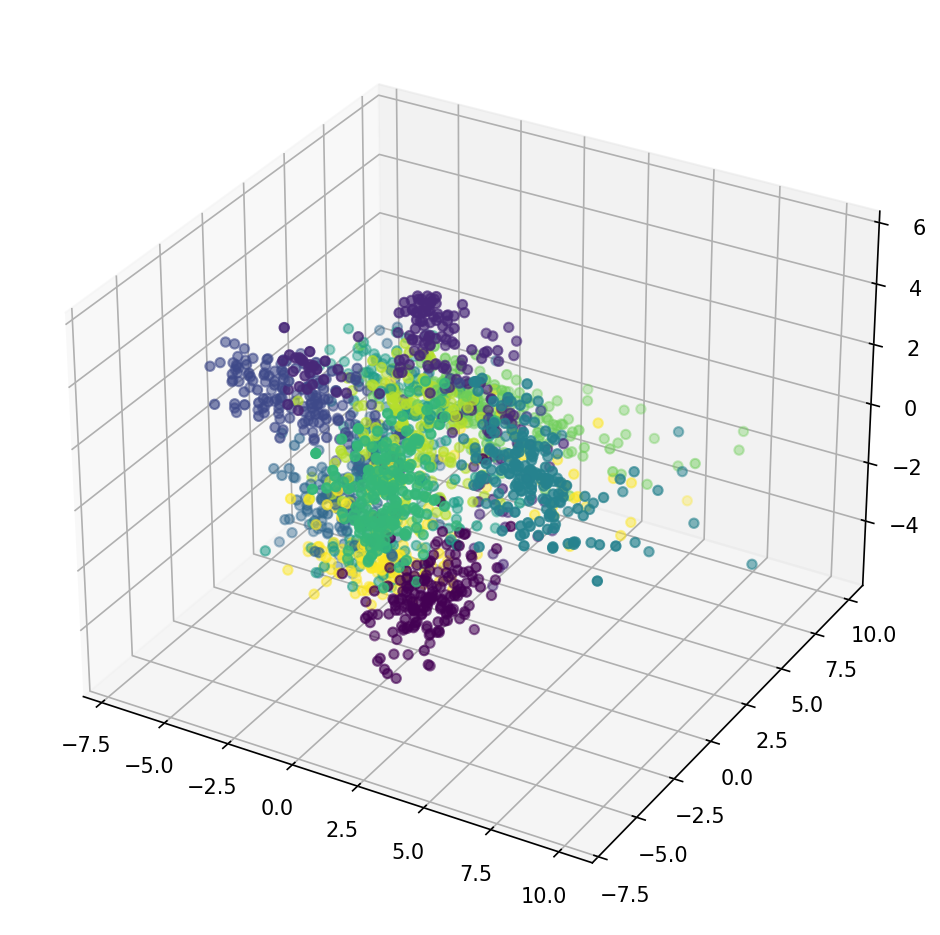

In [52]:
plt.figure(figsize=(8,8),dpi=150)
ax = plt.axes(projection='3d')
ax.scatter3D(pca_pixels[:,0],pca_pixels[:,1],pca_pixels[:,2],c=digits['number_label']);